<a href="https://colab.research.google.com/github/antoinebachand/Data-Analysis/blob/main/HQ_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The purpose of this script is to analyze the network in Quebec with the demand curve and all the assets available to Hydro-Quebec.

The data comes from the following sources:

Demand and export : https://www.hydroquebec.com/documents-data/open-data/history-generation-consumption/ 

Available capacity: https://www.hydroquebec.com/generation/generating-stations.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## First, we'll import and have a quick look at the demand data.

In [2]:
df = pd.read_excel('Data_HQ.xlsx', header=0, index_col=False, keep_default_na=True) 


In [3]:
df.head()

,Rang,mois,jour,Heure,= Production brute des centrales d'HQP (MWh),- Consommation des centrales d'HQP (MWh),+ Électricité reçue par HQP aux points de raccordement des centrales et des interconnexions (MWh),+ Consommation attribuable à la puissance interruptible mise à la disposition d'HQP majorée des pertes de transport (MWh),= Volume d'électricité fournie par les ressources du Producteur (MWh),- Volume des engagements du Producteur envers des tiers (MWh),= Volume d'électricité fournie par le Producteur au Distributeur (MWh),- Volume des approvisionnements hors patrimoniaux provenant d'HQP (MWh),= Volume d'électricité mobilisée par le Distributeur au titre de l'électricité patrimoniale (MWh),Volume d'électricité patrimoniale\n(bâtonnets affectés) (MWh),Volume d'électricité mobilisée par le Distributeur en dépassement de l'électricité patrimoniale (MWh),Coût unitaire du dépassement ($/MWh),= Coût total horaire ($),(DAM HQ + TSC NYPA-HQ + NTAC + SC NYISO) * T ($/MWh)
0,1,1,1,1,21065.133503,51.184428,7984.294194,0,28998.243268,5658.346607,23339.896661,1817.102688,21522.793973,22351,0.0,110.0,0.0,21.95
1,2,1,1,2,20976.085926,51.089358,7922.152870,0,28847.149438,5659.262501,23187.886937,1817.102688,21370.784249,22248,0.0,110.0,0.0,21.07
2,3,1,1,3,20706.549742,50.776583,7960.276294,0,28616.049453,5471.237310,23144.812143,1817.102688,21327.709455,22231,0.0,110.0,0.0,21.50
3,4,1,1,4,20448.412573,50.462610,8047.039060,0,28444.989023,5328.436467,23116.552556,1817.102688,21299.449868,22205,0.0,110.0,0.0,21.84
4,5,1,1,5,21194.385435,51.396431,7903.179459,0,29046.168463,5522.549206,23523.619256,1817.102688,21706.516568,22489,0.0,110.0,0.0,19.20


In [53]:
Load_df = df[['= Volume d\'électricité fournie par le Producteur au Distributeur (MWh)', '= Volume d\'électricité fournie par les ressources du Producteur (MWh)']].copy()
Load_df.columns = ['Electricity supplied by the Generator to the Distributor (MWh)','Demand including the producer\'s commitments to third parties (MWh)' ]
Load_df.head()

,Electricity supplied by the Generator to the Distributor (MWh),Demand including the producer's commitments to third parties (MWh)
0,23339.896661,28998.243268
1,23187.886937,28847.149438
2,23144.812143,28616.049453
3,23116.552556,28444.989023
4,23523.619256,29046.168463


##Now lets plot the data

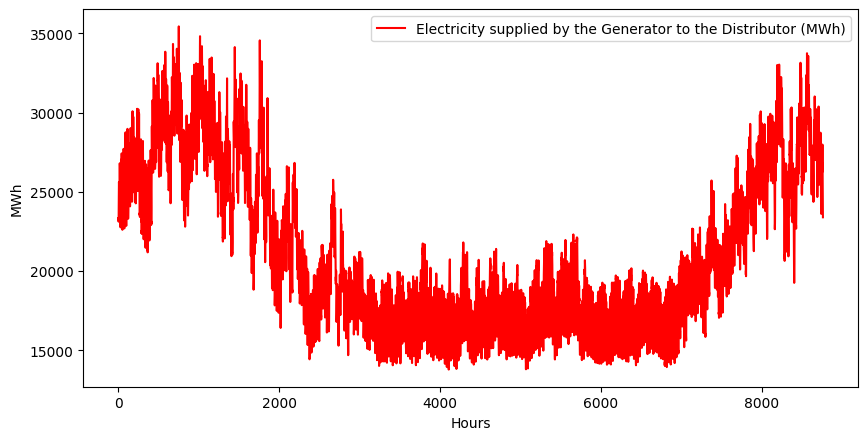

In [7]:
# Data for a full year

fig,ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(Load_df['Electricity supplied by the Generator to the Distributor (MWh)'], 'r', label = 'Electricity supplied by the Generator to the Distributor (MWh)')
ax.set_xlabel('Hours')
ax.set_ylabel('MWh')
ax.legend()
plt.show() 



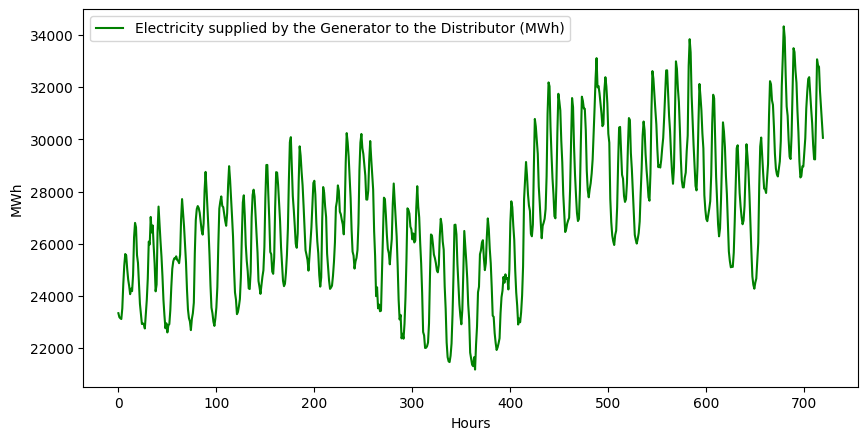

In [8]:
# Here we see the demand curve for the month of January 2021

January = Load_df.iloc[0:720]

fig,ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(January['Electricity supplied by the Generator to the Distributor (MWh)'], 'g', label = 'Electricity supplied by the Generator to the Distributor (MWh)')
ax.set_xlabel('Hours')
ax.set_ylabel('MWh')
ax.legend()
plt.show() 

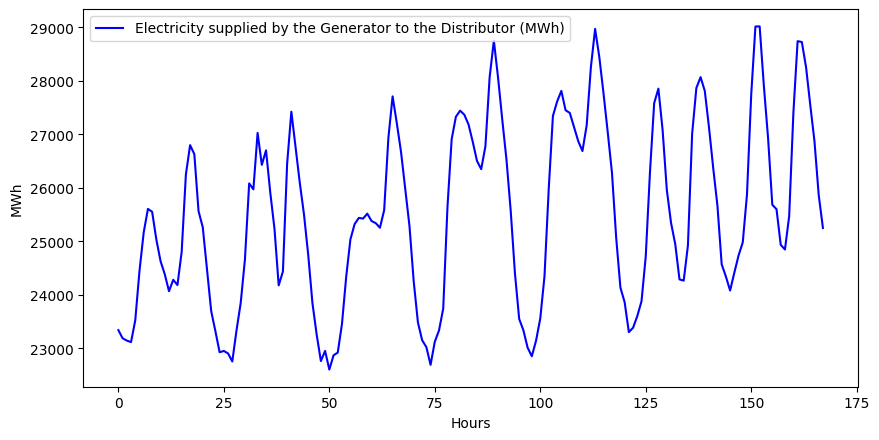

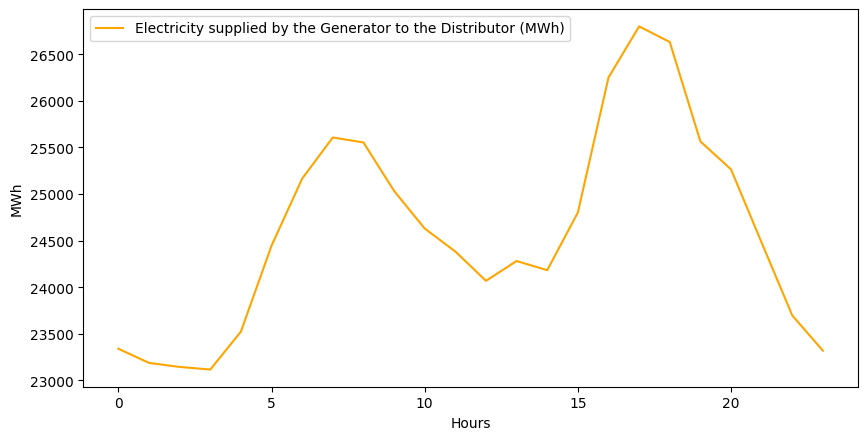

In [9]:
# Here we see the demand curve for the first week and day of January 2021


Week = Load_df.iloc[0:168]

fig,ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(Week['Electricity supplied by the Generator to the Distributor (MWh)'], 'b', label = 'Electricity supplied by the Generator to the Distributor (MWh)')
ax.set_xlabel('Hours')
ax.set_ylabel('MWh')
ax.legend()
plt.show() 

Day = Load_df.iloc[0:24]

fig,ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(Day['Electricity supplied by the Generator to the Distributor (MWh)'], 'orange', label = 'Electricity supplied by the Generator to the Distributor (MWh)')
ax.set_xlabel('Hours')
ax.set_ylabel('MWh')
ax.legend()
plt.show() 

## Now let's import and look at the capacity data

We will have 2 data frames, the first one being the assets operated by Hydro Quebec Production and the second one being the capacity and assets available for Hydro Quebec Distribution.

In [12]:
HQ_Prod = pd.read_excel('HQ_Production.xlsx', header=0, index_col=False, keep_default_na=True) 
Other_supply = pd.read_excel('Other_supply.xlsx', header=0, index_col=False, keep_default_na=True) 

In [13]:
HQ_Prod.head()

,Name,Watersheds,River or other watercourse,Type,Installed capacity (MW),Number of units
0,Beauharnois,St. Lawrence River,Lac Saint-François and canal de Beauharnois,Run-of-river,1912,36
1,Beaumont,Saint-Maurice,Saint-Maurice,Run-of-river,270,6
2,Bernard-Landry (Eastmain-1-A),La Grande,Eastmain,Reservoir,768,3
3,Bersimis-1,Betsiamites,Betsiamites,Reservoir,1178,8
4,Bersimis-2,Betsiamites,Betsiamites,Run-of-river,845,5


In [15]:
#To be noted that for the Churchill Falls (Labrador) Corporation Limited, 
# Hydro-Québec has access to almost all the output until 2041
Other_supply.head()

,Source,Capacity
0,Churchill Falls generating station — Churchill...,5428
1,39 wind farms operated by independent power pr...,3508
2,7 biomass and 3 biogas cogeneration plants ope...,257
3,5 small hydropower plants operated by independ...,65
4,Other,1056


Now let's look at the total available capacity

In [31]:
# We reduce the value by 131MW since since it is associated with the 24 diesel plant of the off-grid systems.
HQ_Prod_Capacity = sum(HQ_Prod['Installed capacity (MW)'])-131    
print('The total Hydro Quebec Production Capacity is: '+ str(HQ_Prod_Capacity)+ ' MWh')
print('The total Hydro Quebec Production Capacity plus the capacity of the wind farm is : '+ str(HQ_Prod_Capacity + 3508)+ ' MWh')

Other_Source = sum(Other_supply['Capacity'])

print('The sum of available capacity including the full Churchill Falls (Labrador) output is: '+ str(HQ_Prod_Capacity + Other_Source)+ ' MWh')

The total Hydro Quebec Production Capacity is: 37098 MWh
The total Hydro Quebec Production Capacity plus the capacity of the wind farm is : 40606 MWh
The sum of available capacity including the full Churchill Falls (Labrador) output is: 47412 MWh


Now let's look at the maximum capacity in context with the demand.

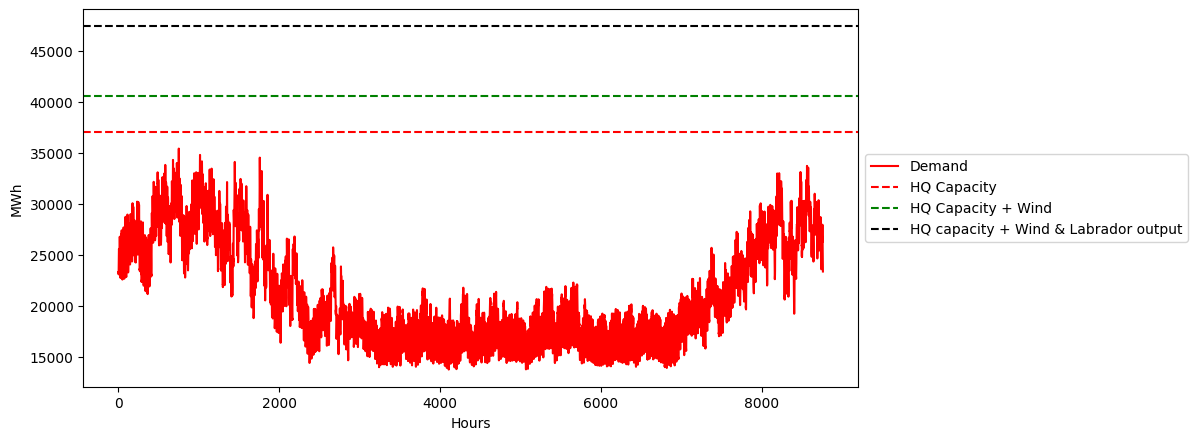

In [46]:

fig,ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(Load_df['Electricity supplied by the Generator to the Distributor (MWh)'], 'r', label = 'Demand')
ax.set_xlabel('Hours')
ax.set_ylabel('MWh')

plt.axhline(y = HQ_Prod_Capacity, color = 'r', linestyle = '--', label = 'HQ Capacity')
plt.axhline(y = HQ_Prod_Capacity + 3508, color = 'g', linestyle = '--', label= 'HQ Capacity + Wind')
plt.axhline(y = (Other_Source+HQ_Prod_Capacity), color = 'k', linestyle = '--', label = 'HQ capacity + Wind & Labrador output')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 


## A more relevant picture would include the producer's commitments to third parties

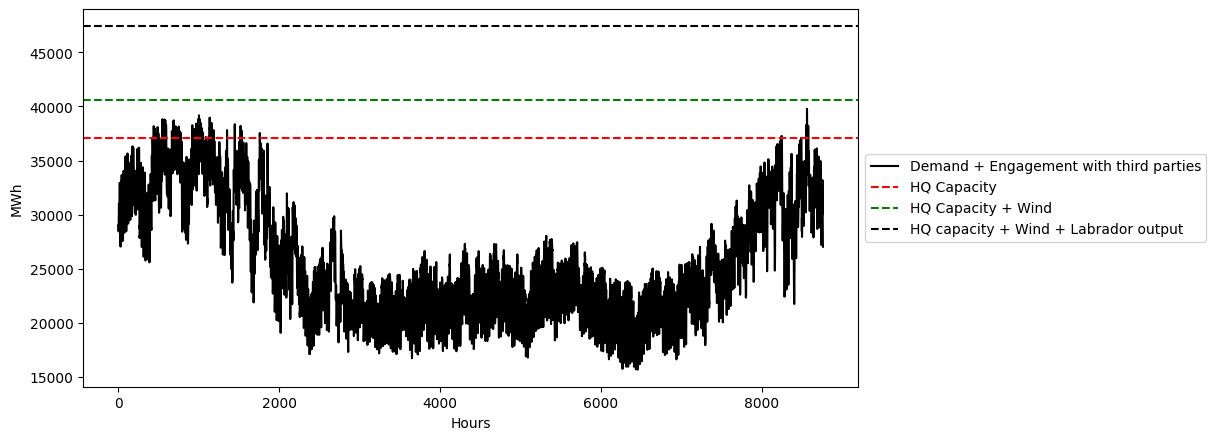

In [58]:
fig,ax = plt.subplots(dpi=100, figsize=(10, 5))
ax.plot(Load_df['Demand including the producer\'s commitments to third parties (MWh)'], 'k', label = 'Demand + Engagement with third parties')
ax.set_xlabel('Hours')
ax.set_ylabel('MWh')

plt.axhline(y = HQ_Prod_Capacity, color = 'r', linestyle = '--', label = 'HQ Capacity')
plt.axhline(y = HQ_Prod_Capacity + 3508, color = 'g', linestyle = '--', label= 'HQ Capacity + Wind')
plt.axhline(y = (Other_Source+HQ_Prod_Capacity), color = 'k', linestyle = '--', label = 'HQ capacity + Wind + Labrador output')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 